<a href="https://colab.research.google.com/github/passer87/aidata/blob/main/%E4%BD%BF%E7%94%A8Python%E5%92%8CKeras%E5%AF%A6%E7%8F%BE%E7%B0%A1%E5%96%AE%E5%9F%83%E5%8F%8A%E8%B1%A1%E5%BD%A2%E6%96%87%E5%AD%97%E8%AD%98%E5%88%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.8745 - loss: 0.4091
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 64ms/step - accuracy: 0.9824 - loss: 0.0566
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step - accuracy: 0.9880 - loss: 0.0379
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.9920 - loss: 0.0268
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.9931 - loss: 0.0215
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9899 - loss: 0.0324
準確率: 0.9925
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


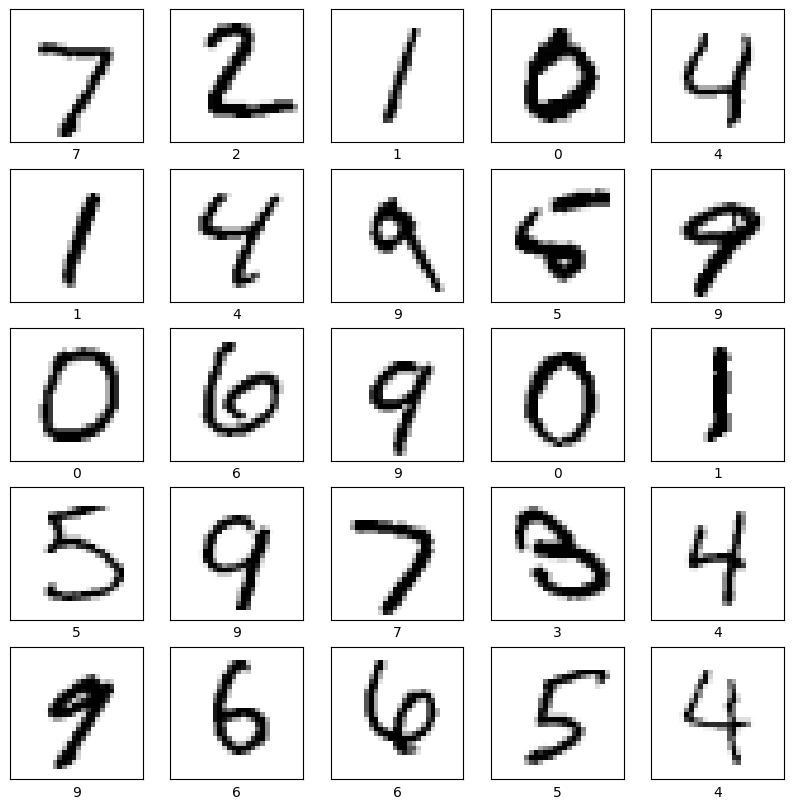

In [ ]:
#使用Python和Keras實現簡單埃及象形文字識別
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 假設我們有一個包含象形文字圖像和標籤的數據集
# 這裡我們使用MNIST數據集來模擬
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# 建立卷積神經網絡模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
model.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=1)

# 評估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'準確率: {test_acc:.4f}')

# 顯示部分預測結果
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
plt.show()